# EDA in Fifa 23 - Ultimate team Dataset
*EDA - Exploratory Data Analysys*

## Context
In Fifa 23, the Ultimate Team game mode allows players to build teams using "cards" representing real-life players, with multiple versions available.

Every month, new campaigns are launched by developers with updated player versions to enhance team performance. 

## Goal
The goal of this notebook is to load, cleaning and analyze the dataset.

## The data
The data was obtained by scraping information from the website Futbin.com, purely for study purposes.

### Explaning the data:

- Name: Name of player
- Team: Team of player
- Country: Country of player
- League: League of player
- Rating: Overall rating of player, using the stats to calculate the overall
- Rare: The lever of rarity of player, could be Rare or Non-rare
- Version Color: Version of card's player
- Position: Main position of player
- Other position: Variaty of position that player can play
- Version: The campaign version of this card
- Run type: Type of running, differs in game
- Price: Price of this card when the data was extracted
- Skill: Skill moves, the ability of execute some dribles
- Weak foot: The ability of using the weak foot.
- Attack rate: The ability of going to attack
- Defense rate: The ability of going to defense
- Pace: Ability to run (0 - 100)
- Shoot: Ability to shoot (0 - 100)
- Pass: Ability to pass (0 - 100)
- Drible: Ability to drible/ agility (0 - 100)
- Defense: Ability to execute defensive moves (0 - 100)
- Physical: Physical ability (0 - 100)
- Body type: Type of body, some players have a unique body type
- Height (cm): Player's Height in centimeters
- Weight (kg): Player's weight in kilograms
- Popularity: Upvotes/ feedbak of players in Futbin website
- Base stats: Stats considering Pace, Shoot, Pass, Drible, Defense and Physical
- In game stats: Stats considering all atributes and player's behaviour in game
- Game version: Ultimate team version
- Updated at: Date of extraction

# Step 1 - Import Libs, load data and a overview on Dataframe
The first step is import the libs that we'll use in this project.

We should load the data from a local file (csv) and store it in a dataframe.

After that, we should take a look on the dataset, check their dataypes, the size and etc.

In [1]:
import pandas as pd
import re
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

# define style for charts
plt.style.use('ggplot')

# expand number of columns to better viz
pd.set_option('display.max_columns', 50)

# set precision to 5 decimal places
pd.set_option('display.float_format', lambda x: '%.0f' % x)

%load_ext nb_black

df_players = pd.read_csv("data/players.csv")

<IPython.core.display.Javascript object>

In [2]:
# check the size of dataset (rows, columns)
df_players.shape

(4020, 30)

<IPython.core.display.Javascript object>

In [3]:
# check 10 random samples of dataset
df_players.sample(10)

,Name,Team,Country,League,Rating,Rare,Version_color,Position,Other_Positions,Version,Run_type,Price,Skill,Weak_foot,Attack_rate,Defense_rate,Pace,Shoot,Pass,Drible,Defense,Physical,Body_type,Height_cm,Weight (kg),Popularity,Base_Stats,In_Game_Stats,Game_version,Updated_at
1808,Otávio,FC Porto,Portugal,Liga NOS (POR 1),84,rare,if gold,RM,"LM,RW",IF,Explosive,14.5K,4,3,H,H,81,72,83,87,65,73,Average,171,67,43,461,2212,FIFA 23,2023-04-17
698,Alves da Silva,Brazil,Brazil,World Cup,88,rare,wc_stories gold,RB,"RWB,RM",World Cup Stories,Explosive,75K,4,3,H,M,90,78,89,86,85,82,Average,172,70,951,510,2480,FIFA 23,2023-04-17
1606,Kai Havertz,Chelsea,Germany,Premier League,84,rare,gold,CAM,"CF,ST",Rare,Controlled,3.7K,4,4,M,M,81,79,79,84,45,66,Unique,189,82,167,434,2079,FIFA 23,2023-04-17
186,Riquelme,FUT ICONS,Argentina,Icons,91,rare,icon gold,CAM,NaN,Icon,Controlled,74K,5,4,M,L,70,87,93,93,32,69,Average,183,79,-15,444,2194,FIFA 23,2023-04-17
729,Henrikh Mkhitaryan,Inter,Armenia,Serie A TIM,88,rare,showdown_plus gold,CAM,CM,ShowDown SBC,Controlled,77.1K,4,5,H,L,89,86,86,90,63,80,Average,177,75,983,494,2379,FIFA 23,2023-04-17
933,Federico Chiesa,Juventus,Italy,Serie A TIM,87,rare,out_of_position gold,RW,"RM,CAM",Out Of Position SBC,Explosive,140.15K,4,4,H,M,93,85,81,89,51,77,Average,175,70,5898,476,2226,FIFA 23,2023-04-17
216,Robert Lewandowski,FC Barcelona,Poland,LaLiga Santander,91,rare,gold,ST,CF,Normal,Controlled,58K,4,4,H,M,75,91,79,86,44,83,Unique,185,81,1183,458,2242,FIFA 23,2023-04-17
2304,Edin Višća,Trabzonspor,Bosnia and Herzegovina,Süper Lig (TUR 1),81,rare,gold,RM,RW,NaN,Explosive,750,4,4,H,M,87,78,78,82,47,64,Lean,172,63,26,436,2087,FIFA 23,2023-04-17
2819,Rafa Mir,Sevilla FC,Spain,LaLiga Santander,79,non-rare,gold,ST,CF,NaN,Lengthy,900,3,3,H,L,78,81,67,71,45,78,High & Stocky,191,86,5,420,1971,FIFA 23,2023-04-17
3077,Jonas Omlin,M'gladbach,Switzerland,Bundesliga,79,non-rare,gold,GK,NaN,non-rare,Controlled,750,1,4,M,M,80,75,73,82,52,76,High & Average,189,80,34,438,1027,FIFA 23,2023-04-17


<IPython.core.display.Javascript object>

In [4]:
# check the name and the type of each column, and if there is some missing values
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4020 non-null   object 
 1   Team             4020 non-null   object 
 2   Country          4020 non-null   object 
 3   League           4020 non-null   object 
 4   Rating           4020 non-null   int64  
 5   Rare             4020 non-null   object 
 6   Version_color    4020 non-null   object 
 7   Position         4020 non-null   object 
 8   Other_Positions  2986 non-null   object 
 9   Version          3346 non-null   object 
 10  Run_type         4020 non-null   object 
 11  Price            4020 non-null   object 
 12  Skill            4020 non-null   int64  
 13  Weak_foot        4020 non-null   int64  
 14  Attack_rate      4020 non-null   object 
 15  Defense_rate     4020 non-null   object 
 16  Pace             4020 non-null   int64  
 17  Shoot         

<IPython.core.display.Javascript object>

# Step 2 - Data preparation
In this step we prepare the data for further analysis, it's included:
- Normalize the column name
- Normalize the prices
- Adjust the data types
- Deal with whitespace
- Deal with missing values 
- Deal with duplicated values
- Remove useless data

## Normalize column name
The data set has a pattern in the column names, but it's easier to manipulate if they are with no space and lowercase, so let's implement this simple fix.

In [5]:
columns = df_players.columns.str.replace(" ", "_")\
                            .str.replace("(", "")\
                            .str.replace(")", "")\
                            .str.lower()

df_players.columns = list(columns)

C:\Users\Felipe Mayer\AppData\Local\Temp\ipykernel_32948\2323474123.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace("(", "")\
C:\Users\Felipe Mayer\AppData\Local\Temp\ipykernel_32948\2323474123.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace(")", "")\


<IPython.core.display.Javascript object>

## Normalize the price
The column price, as you may notice, is a Object, it means, a string. We'll use this column to some analysis so it's crucial to change them to a numeric value and normalize it.

The numbers are expressed with K for thousand and M to million, for exemple 14.000 it's 14K. So we need to change the letter (K or M) to correspodent 0's (000 and 000000). After that, change the datatype to integer.

In [6]:
df_players['price'] = df_players['price'].replace({'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(np.int64)

df_players['price']

0        3980000
1        4820000
2        2230000
3       11400000
4        2500000
          ...   
4015           0
4016           0
4017           0
4018           0
4019           0
Name: price, Length: 4020, dtype: int64

<IPython.core.display.Javascript object>

## Adjust the Data type

As you may notice, the dataset loaded has a good data type definition, excepts for "updated_at" column, it's a Object but it's a date, so we need to change it's data type.

In [7]:
df_players['updated_at'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4020 entries, 0 to 4019
Series name: updated_at
Non-Null Count  Dtype 
--------------  ----- 
4020 non-null   object
dtypes: object(1)
memory usage: 31.5+ KB


<IPython.core.display.Javascript object>

In [8]:
df_players['updated_at'] = df_players['updated_at'].astype('datetime64[ns]')

df_players['updated_at'].sample(5)

2238   2023-04-17
126    2023-04-17
3802   2023-04-17
3168   2023-04-17
1094   2023-04-17
Name: updated_at, dtype: datetime64[ns]

<IPython.core.display.Javascript object>

We can change the type of some columns to Category to descrease de memory usage.

In [9]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             4020 non-null   object        
 1   team             4020 non-null   object        
 2   country          4020 non-null   object        
 3   league           4020 non-null   object        
 4   rating           4020 non-null   int64         
 5   rare             4020 non-null   object        
 6   version_color    4020 non-null   object        
 7   position         4020 non-null   object        
 8   other_positions  2986 non-null   object        
 9   version          3346 non-null   object        
 10  run_type         4020 non-null   object        
 11  price            4020 non-null   int64         
 12  skill            4020 non-null   int64         
 13  weak_foot        4020 non-null   int64         
 14  attack_rate      4020 non-null   object 

<IPython.core.display.Javascript object>

In [10]:
cols = ['team', 'country', 'league', 'rare', 'position', 'run_type',
         'attack_rate', 'defense_rate', 'body_type', 'game_version']

for col in cols:
    df_players[col] = df_players[col].astype('category')

df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             4020 non-null   object        
 1   team             4020 non-null   category      
 2   country          4020 non-null   category      
 3   league           4020 non-null   category      
 4   rating           4020 non-null   int64         
 5   rare             4020 non-null   category      
 6   version_color    4020 non-null   object        
 7   position         4020 non-null   category      
 8   other_positions  2986 non-null   object        
 9   version          3346 non-null   object        
 10  run_type         4020 non-null   category      
 11  price            4020 non-null   int64         
 12  skill            4020 non-null   int64         
 13  weak_foot        4020 non-null   int64         
 14  attack_rate      4020 non-null   categor

<IPython.core.display.Javascript object>

## Deal with whitespace

Some data has whitespace, since the data was scrapped so we need to remove it. To make it easier we will remove the whitespace of every String column, even if it doens't needed

In [11]:
for col in df_players.columns:
    if df_players[col].dtype == 'object':
        df_players[col] = df_players[col].str.strip()

<IPython.core.display.Javascript object>

## Deal with missing values 
There is some columns with missing values, let's deal with deal properly.

- For "version" column, we need to understand which players without a version and why, so we can deal with that.
- For "height" and "weight" columns, we need to understand below what's happen and choose the best way to deal it.
- For "body_type" column, there is a patter to define the body type of player, we can user it to fill the null values.

In [12]:
df_players.isna().sum()

name                  0
team                  0
country               0
league                0
rating                0
rare                  0
version_color         0
position              0
other_positions    1034
version             674
run_type              0
price                 0
skill                 0
weak_foot             0
attack_rate           0
defense_rate          0
pace                  0
shoot                 0
pass                  0
drible                0
defense               0
physical              0
body_type            17
height_cm             2
weight_kg            17
popularity            0
base_stats            0
in_game_stats         0
game_version          0
updated_at            0
dtype: int64

<IPython.core.display.Javascript object>

### Column: "version"
Some players without 'version' filled, but they belong to sub-groups with same 'version_color'. We'll use the 'version-color' information to fill the 'version' missing value columns.

In [13]:
df_players['version'].isna().sum()

674

<IPython.core.display.Javascript object>

In [14]:
df_players[df_players['version_color'].isin(df_players[df_players['version'].isna()]\
                                            ['version_color'].unique())]\
                                            [['version', 'version_color' ]]\
                                            .value_counts(dropna=False)

version       version_color      
NaN           gold                   640
Normal        gold                   280
Rare          gold                    87
non-rare      gold                    27
NaN           bd_icon gold            18
              libertadores_b gold     15
Non-Rare      gold                     7
Libertadores  libertadores_b gold      1
SBC           bd_icon gold             1
NaN           sudamericana gold        1
dtype: int64

<IPython.core.display.Javascript object>

In [15]:
df_players['version'].fillna(df_players['version_color'])

# change the type of the column 'version' and 'version_color' to category
df_players['version'] = df_players['version'].astype('category')
df_players['version_color'] = df_players['version_color'].astype('category')

<IPython.core.display.Javascript object>

In [16]:
df_players['version'].isna().sum()

674

<IPython.core.display.Javascript object>


### Deal with "height" and "weight" columns

Some players has 0 as weight, let's change it to NaN and deal with them.

In [17]:
df_players['weight_kg'].replace(0, np.nan, inplace=True)

<IPython.core.display.Javascript object>

There is a correlation between height and weight, so we'll fill the missing values of 'weight' with the avarage value of other players with same "height"

In [18]:
# check the correlation between height and weight
df_players['height_cm'].corr(df_players['weight_kg'])

0.7697453215779397

<IPython.core.display.Javascript object>

In [19]:
# group by height and calculate the mean of weight
df_player_groupedby_height = df_players[df_players['weight_kg'].notnull()].groupby('height_cm')['weight_kg'].mean()

df_player_groupedby_height.sample(n=5)

height_cm
196   87
167   65
188   82
170   67
166   63
Name: weight_kg, dtype: float64

<IPython.core.display.Javascript object>

Using the height grouped dataframe above to fill the missing values of weight

In [20]:
df_players['weight_kg'] = df_players['weight_kg'].fillna(df_players['height_cm'].map(df_player_groupedby_height))

df_players[df_players['weight_kg'].isna()]

,name,team,country,league,rating,rare,version_color,position,other_positions,version,run_type,price,skill,weak_foot,attack_rate,defense_rate,pace,shoot,pass,drible,defense,physical,body_type,height_cm,weight_kg,popularity,base_stats,in_game_stats,game_version,updated_at
89,Casillas Fernández,FUT ICONS,Spain,Icons,93,rare,trophy_titans_icon gold,GK,NaN,Trophy Titans - ICON,Controlled,99000,1,3,M,M,94,91,87,96,62,92,NaN,NaN,NaN,1189,522,1359,FIFA 23,2023-04-17
137,Casillas Fernández,FUT ICONS,Spain,Icons,92,rare,icon gold,GK,NaN,Icon,Controlled,145000,1,3,M,M,93,89,85,95,60,91,NaN,NaN,NaN,216,513,1355,FIFA 23,2023-04-17


<IPython.core.display.Javascript object>

Two entries still empty in terms of height weight and body type. The player is Casillas, he had more versions and only this two don't have this information, so we sould add it manually.

In [21]:
# find all entries with name Casillas
df_casillas = df_players[df_players['name'].str.contains('Casillas')]

# get the height mean of all Casillas (not null)   
height_mean = df_casillas[df_casillas['height_cm'].notnull()]['height_cm'].mean()

# get the weight mean of all Casillas (not null)
weight_mean = df_casillas[df_casillas['weight_kg'].notnull()]['weight_kg'].mean()

# get Casillas body_type information   
body_type = df_casillas[df_casillas['body_type'].notnull()]['body_type'].unique()

<IPython.core.display.Javascript object>

In [22]:
# replace miss values of Casillas with the mean of height and weight
df_players.loc[df_players['name'].str.contains('Casillas'), 'height_cm'] = df_players.loc[df_players['name'].str.contains('Casillas'), 'height_cm'].fillna(height_mean).round(1)
df_players.loc[df_players['name'].str.contains('Casillas'), 'weight_kg'] = df_players.loc[df_players['name'].str.contains('Casillas'), 'weight_kg'].fillna(weight_mean).round(1)

# fill na value of Casillas body_type with the most common value
df_players.loc[df_players['name'].str.contains('Casillas'), 'body_type'] = df_players.loc[df_players['name'].str.contains('Casillas'), 'body_type'].fillna(body_type[0])

# find all entries with name Casillas
df_players[df_players['name'].str.contains('Casillas')][['name', 'body_type', 'height_cm', 'weight_kg']]

,name,body_type,height_cm,weight_kg
89,Casillas Fernández,Average,185,77
137,Casillas Fernández,Average,185,77
234,Iker Casillas,Average,185,78
474,Iker Casillas,Average,185,84
906,Iker Casillas,Average,185,70


<IPython.core.display.Javascript object>

In [23]:
# show players with null values in any column
df_players.isna().sum()

name                  0
team                  0
country               0
league                0
rating                0
rare                  0
version_color         0
position              0
other_positions    1034
version             674
run_type              0
price                 0
skill                 0
weak_foot             0
attack_rate           0
defense_rate          0
pace                  0
shoot                 0
pass                  0
drible                0
defense               0
physical              0
body_type            15
height_cm             0
weight_kg             0
popularity            0
base_stats            0
in_game_stats         0
game_version          0
updated_at            0
dtype: int64

<IPython.core.display.Javascript object>

### Deal with 'body_type' column

The idea is to use the Height and Weight to define the body type that are missing. We used BMI (body mass index) to define the boundaries.

For this column it's ok if we aren't 100% sure about the value.

In [24]:
#create a new column BMI (body mass index) bmi = weight / (height ** 2)
df_players['bmi'] = (df_players['weight_kg'] / (df_players['height_cm']/100) ** 2).round(0)

df_players[['weight_kg', 'height_cm', 'bmi']].sample(5)

,weight_kg,height_cm,bmi
3840,86,190,24
597,68,177,22
3314,77,185,22
2816,78,181,24
1519,76,171,26


<IPython.core.display.Javascript object>

In [25]:
# group by body_type and calculate the mean of bmi
df_player_groupedby_body_type = df_players.groupby('body_type')['bmi'].mean().round(0)

# create a dict based on groups
dict_bmi_bodytype = {v: k for k, v in df_player_groupedby_body_type.items()}

dict_bmi_bodytype

{23.0: ' Unique',
 22.0: ' Short & Lean',
 24.0: ' Ronaldinho',
 21.0: ' High & Lean ',
 25.0: ' Stocky'}

<IPython.core.display.Javascript object>

In [26]:
# fill na values of body_type with dictionary
df_players['body_type'] = df_players['body_type'].fillna(df_players['bmi'].map(dict_bmi_bodytype))

<IPython.core.display.Javascript object>

In [27]:
df_players.isna().sum()

name                  0
team                  0
country               0
league                0
rating                0
rare                  0
version_color         0
position              0
other_positions    1034
version             674
run_type              0
price                 0
skill                 0
weak_foot             0
attack_rate           0
defense_rate          0
pace                  0
shoot                 0
pass                  0
drible                0
defense               0
physical              0
body_type             0
height_cm             0
weight_kg             0
popularity            0
base_stats            0
in_game_stats         0
game_version          0
updated_at            0
bmi                   0
dtype: int64

<IPython.core.display.Javascript object>

There is some missing values on "other_positions" column, but it's not a problem since not every players will have more than one position to play. 

## Duplicated values
Some players has more than one version, and it's fine, but we should understand if some players has the same Name, Team, Rating, Version and Position. 

In [28]:
df_players.loc[df_players.duplicated(subset=['name',
                                             'team', 
                                            'rating',
                                            'league',
                                            'version',
                                            'position'], keep=False)]

,name,team,country,league,rating,rare,version_color,position,other_positions,version,run_type,price,skill,weak_foot,attack_rate,defense_rate,pace,shoot,pass,drible,defense,physical,body_type,height_cm,weight_kg,popularity,base_stats,in_game_stats,game_version,updated_at,bmi
402,Oleksandr Zinchenko,Arsenal,Ukraine,Premier League,90,rare,fut-bd gold,LB,LWB,FUT Birthday,Controlled,258000,5,4,H,M,90,78,89,90,87,81,Lean,175,64,903,515,2486,FIFA 23,2023-04-17,21
403,Oleksandr Zinchenko,Arsenal,Ukraine,Premier League,90,rare,fut-bd gold,LB,LWB,FUT Birthday,Controlled,255000,4,5,H,M,90,78,89,90,87,81,Lean,175,64,621,515,2486,FIFA 23,2023-04-17,21
570,Darwin Núñez,Liverpool,Uruguay,Premier League,89,rare,fut-bd gold,LW,"CF,ST",FUT Birthday,Controlled,400000,4,5,H,H,95,88,77,86,48,92,High & Average+,186,80,1099,486,2305,FIFA 23,2023-04-17,23
571,Darwin Núñez,Liverpool,Uruguay,Premier League,89,rare,fut-bd gold,LW,"CF,ST",FUT Birthday,Controlled,415000,5,4,H,H,95,88,77,86,48,92,High & Average+,186,80,821,486,2305,FIFA 23,2023-04-17,23
665,David Alaba,Real Madrid,Austria,LaLiga Santander,88,rare,halloween gold,CB,NaN,Rulebreakers,Controlled,0,3,4,M,M,81,66,85,83,91,81,Average,180,78,-773,487,2360,FIFA 23,2023-04-17,24
666,David Alaba,Real Madrid,Austria,LaLiga Santander,88,rare,halloween gold,CB,NaN,Rulebreakers,Controlled,0,3,4,M,M,81,66,85,83,87,87,Average,180,78,2872,489,2367,FIFA 23,2023-04-17,24
817,Jorge Resurrección,Atlético de Madrid,Spain,LaLiga Santander,88,rare,fut-bd gold,CM,CDM,FUT Birthday,Controlled,35000,4,5,M,M,80,81,90,85,83,84,Average,176,77,-77,503,2410,FIFA 23,2023-04-17,25
818,Jorge Resurrección,Atlético de Madrid,Spain,LaLiga Santander,88,rare,fut-bd gold,CM,CDM,FUT Birthday,Controlled,34750,5,4,M,M,80,81,90,85,83,84,Average,176,77,200,503,2410,FIFA 23,2023-04-17,25
828,Mattéo Guendouzi,OM,France,Ligue 1,88,rare,fut-bd gold,CM,CDM,FUT Birthday,Controlled,378000,5,4,M,H,83,82,87,84,86,89,High & Average+,185,68,752,511,2445,FIFA 23,2023-04-17,20
829,Mattéo Guendouzi,OM,France,Ligue 1,88,rare,fut-bd gold,CM,CDM,FUT Birthday,Controlled,357000,4,5,M,H,83,82,87,84,86,89,High & Average+,185,68,540,511,2445,FIFA 23,2023-04-17,20


<IPython.core.display.Javascript object>

In [29]:
# drop duplicated values
df_players.drop_duplicates(subset=['name',
                                            'team', 
                                            'rating',
                                            'league',
                                            'version',
                                            'position'], 
                                            keep='first', inplace=True)

df_players.shape

(4011, 31)

<IPython.core.display.Javascript object>

## Remove useless data

Some entries are useless to the analysis so we sould remove it.

### World Cup players
For the purposes of this analysis, we will exclude two special versions of player cards: "World Cup Player",

In [30]:
df_players = df_players.query('version != "World Cup Player"')
df_players.shape

(2899, 31)

<IPython.core.display.Javascript object>

### Keep players with high rating
Choosing players who have a rating of 83 or higher. For those below 83 the price is almost the same

In [31]:
df_players = df_players.loc[df_players['rating'] >= 84]\
                                .reset_index(drop=True)\
                                .copy()

df_players.shape

(1722, 31)

<IPython.core.display.Javascript object>

### Players with 0 price
Some players doen't have a price, so we need to remove then to don't misleading the analysis.

In [32]:
# remove players with price == 0
df_players = df_players[df_players['price'] != 0].reset_index(drop=True).copy()

df_players.shape

(1579, 31)

<IPython.core.display.Javascript object>

## Step 3 - Feature Understanding

### Fastest players by position

Pace is one of the most important attributes for a player, what if you build a team with the fastest players of game? And who much would cost to build this team?

In [33]:
# group by position and pace and calculate the mean of price
df_fastest_players = df_players.groupby(['position', 'pace'])['name'].max().reset_index()

# drop na values
df_fastest_players.dropna(inplace=True)

# drop duplicated values to find the last player with the highest pace
df_fastest_players = df_fastest_players.drop_duplicates(subset=['position'], keep='last')

# merge to get name and price information
df_fastest_players_merged = pd.merge(df_fastest_players, df_players, how='left', left_index=True, right_index=True)

# select columns of interest
df_fastest_players = df_fastest_players_merged[['position_x', 'pace_x', 'name_x', 'price']]

<IPython.core.display.Javascript object>

In [34]:
print(f"This team would cost {df_fastest_players_merged['price'].sum():,.0f} (in game currency) to be build. It's fast but isn't cheap.")

This team would cost 3,402,150 (in game currency) to be build. It's fast but isn't cheap.


<IPython.core.display.Javascript object>

### Most valuable Teams
What is the top 10 most expensive teams? What is the mean price of each player of these teams?

In [35]:
df_team_expensive_players = df_players.groupby(['team'])\
                                        .agg({'price': 'sum',
                                              'name': 'count'})\
                                        .reset_index()\
                                        .sort_values(by='price', ascending=False)

df_team_expensive_players['price_mean'] = (df_team_expensive_players['price'] / df_team_expensive_players['name']).round(0)

df_team_expensive_players = df_team_expensive_players.head()

<IPython.core.display.Javascript object>

In [36]:
print(f"The most expensive team is {df_team_expensive_players.iloc[0]['team']} with {df_team_expensive_players.iloc[0]['price']:,.0f} (in game currency) per player.")
print(f"The most expensive team considering the price mean is {df_team_expensive_players.iloc[1]['team']} with {df_team_expensive_players.iloc[1]['price_mean']:,.0f} (in game currency) per player.")

The most expensive team is FUT ICONS with 207,023,150 (in game currency) per player.
The most expensive team considering the price mean is Paris SG with 1,204,502 (in game currency) per player.


<IPython.core.display.Javascript object>

### Correlation between features
Let's find some correlation between the features. Which feature has the better correlation with price?

In [37]:
top_10_leagues = df_players['league'].value_counts().head(10)

df_top_league_players = df_players.loc[df_players['league'].isin(top_10_leagues.index)]

<IPython.core.display.Javascript object>

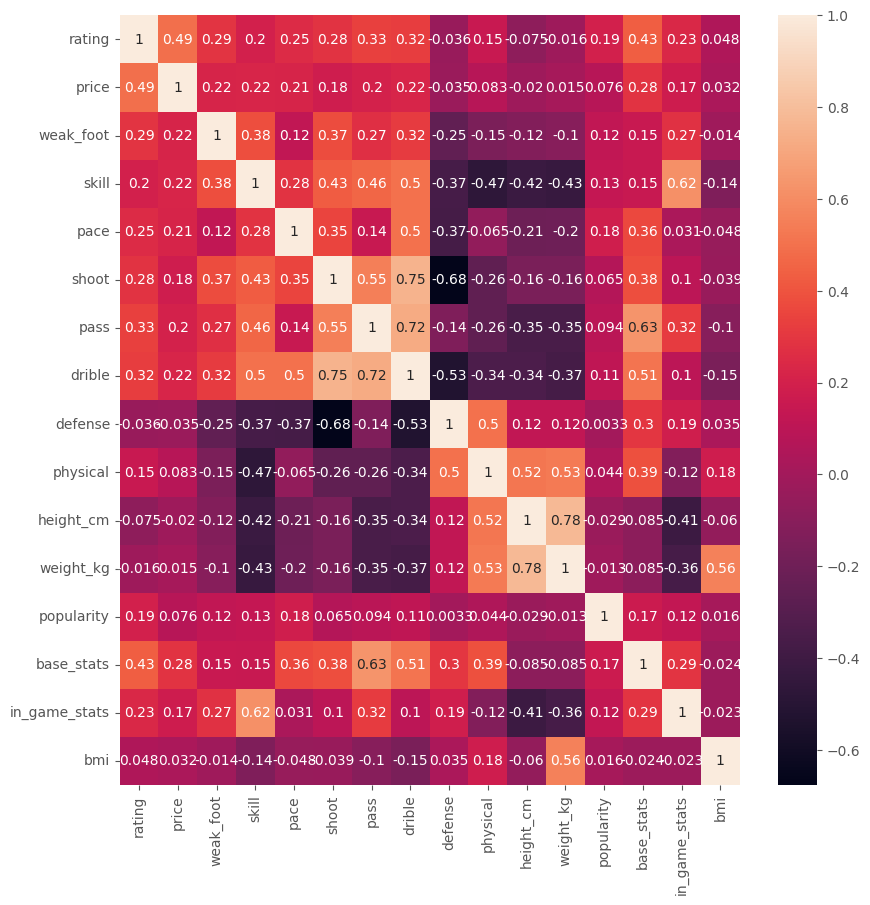

<IPython.core.display.Javascript object>

In [38]:
df_corr = df_top_league_players[['rating','price', 'weak_foot', 'skill', 
                                 'pace', 'shoot', 'pass', 'drible', 'defense', 'physical', 
                                 'height_cm', 'weight_kg', 'popularity', 'base_stats','in_game_stats', 'bmi' ]].dropna().corr()
ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(df_corr, annot=True)

plt.show()

#### Takeways:

Rating is the feature with more correlation with Price, about 0.49 followed by base_stats.

Height and Weight has the biggest correlation, 0.78, and it's a bit obvious since the taller you are, you should be more weighty.

Drible, shot and Pass are 3 features with a good correlation between them, it seems a caracteristic of ofensive players.




### Price per rating
There is a correlation between Price and Rating, and let's see it in a box plot.

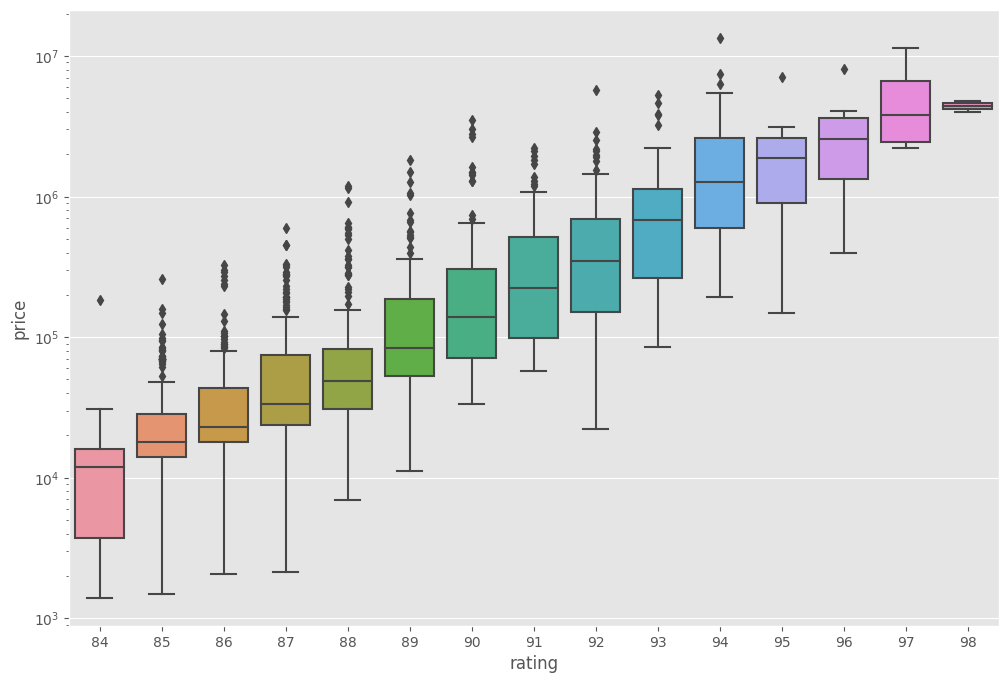

<IPython.core.display.Javascript object>

In [39]:
f, ax = plt.subplots(figsize=(12, 8))
ax.set_yscale("log")
f = sns.boxplot(x='rating',y='price', data=df_players.query('price > 0'))


#### Takeaways
As expected with more Rating more expensive is the Player. 

There is some overpriced and underpriced players, considering only the Rating as parameter.

### Overpriced and Underpriced players
Which players is overpriced/ underpriced considering the outliers per Rating? The idea is to group players by rating, understand which player cost more than the mean, more than the 0.9 quartile, and 0.1 quartile.

In [40]:
# 90th Percentile
def q90(x):
    return x.quantile(0.9)

# 10th Percentile
def q10(x):
    return x.quantile(0.1)

df_price_rating = df_players.groupby('rating').agg({'price':  [q90, q10, 'mean']}).reset_index().round(0)

df_price_rating

rating   price                
              q90     q10    mean
0      84   20900    3600   12550
1      85   70000    9000   30020
2      86   78750   16000   41506
3      87  158505   20750   67268
4      88  223600   28000  102868
5      89  332800   36000  172581
6      90  641750   51000  336466
7      91  974400   71600  412724
8      92 1732000   90300  635735
9      93 3411000  114175 1124254
10     94 5565000  312300 2323633
11     95 3110000  425000 2122182
12     96 5630000  749800 2991714
13     97 9510000 2311000 5307500
14     98 4736000 4064000 4400000

<IPython.core.display.Javascript object>

In [41]:
df_players_pricing = df_players[['name', 'rating','version_color', 'version', 'price']]

df_players_pricing = df_players_pricing.merge(df_price_rating, how='left', on='rating')

df_players_pricing.columns = ['name', 'rating', 'version_color', 'version', 'price', 'q90', 'q10', 'mean']

df_players_pricing

C:\Users\Felipe Mayer\AppData\Local\Temp\ipykernel_32948\1190424969.py:3: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df_players_pricing = df_players_pricing.merge(df_price_rating, how='left', on='rating')
C:\Users\Felipe Mayer\AppData\Local\Temp\ipykernel_32948\1190424969.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_players_pricing = df_players_pricing.merge(df_price_rating, how='left', on='rating')


,name,rating,version_color,version,price,q90,q10,mean
0,Pelé,98,icon gold,Icon,3980000,4736000,4064000,4400000
1,Lionel Messi,98,toty gold,TOTY,4820000,4736000,4064000,4400000
2,Karim Benzema,97,toty gold,TOTY,2230000,9510000,2311000,5307500
3,Kylian Mbappé,97,toty gold,TOTY,11400000,9510000,2311000,5307500
4,Kevin De Bruyne,97,toty gold,TOTY,2500000,9510000,2311000,5307500
...,...,...,...,...,...,...,...,...
1574,Joan Jordán,84,europa_motm gold,Europa League MOTM,15500,20900,3600,12550
1575,Orkun Kökçü,84,europa_motm gold,Europa League MOTM,15500,20900,3600,12550
1576,John McGinn,84,if gold,IF,11250,20900,3600,12550
1577,Ludovic Ajorque,84,if gold,IF,11250,20900,3600,12550


<IPython.core.display.Javascript object>

#### Overpriced players

In [42]:
# create a new column overpriced based on price and q75
df_players_pricing['overpriced'] = df_players_pricing['price'] > df_players_pricing['q90']

# create a new column underpriced based on price and q25
df_players_pricing['underpriced'] = df_players_pricing['price'] < df_players_pricing['q10']

df_players_pricing.query('overpriced == True | underpriced == True')

,name,rating,version_color,version,price,q90,q10,mean,overpriced,underpriced
0,Pelé,98,icon gold,Icon,3980000,4736000,4064000,4400000,False,True
1,Lionel Messi,98,toty gold,TOTY,4820000,4736000,4064000,4400000,True,False
2,Karim Benzema,97,toty gold,TOTY,2230000,9510000,2311000,5307500,False,True
3,Kylian Mbappé,97,toty gold,TOTY,11400000,9510000,2311000,5307500,True,False
6,Ronaldo,96,icon gold,Icon,8030000,5630000,749800,2991714,True,False
...,...,...,...,...,...,...,...,...,...,...
1524,Darwin Núñez,84,if gold,IF,24000,20900,3600,12550,True,False
1527,Saleh Al Shehri,84,wc_stories gold,World Cup Stories,21500,20900,3600,12550,True,False
1529,Tahith Chong,84,winter_wildcards gold,Winter Wildcards,26500,20900,3600,12550,True,False
1533,Luke Shaw,84,if gold,IF,24500,20900,3600,12550,True,False


<IPython.core.display.Javascript object>

### Best deals by rating
Considering the underpriced players, which players are the best deals by rating?

In [52]:
df_players_pricing.query('underpriced == True').\
                        groupby(['rating', 'name', 'q10'])['price'].min()\
                        .sort_values(ascending=False).head(20)\
                        .reset_index()

,rating,name,q10,price
0,98,Pelé,4064000,3980000
1,97,Karim Benzema,2311000,2230000
2,96,Thibaut Courtois,749800,397000
3,94,Steven Gerrard,312300,297000
4,94,Müller,312300,272000
5,94,Robert Lewandowski,312300,192000
6,95,Marco van Basten,425000,149000
7,93,Patrick Kluivert,114175,114000
8,93,Marco van Basten,114175,99000
9,93,Casillas Fernández,114175,99000


<IPython.core.display.Javascript object>

### Most popular players

Which players is more popular in the dataset?

In [50]:
# order by popularity
df_players.sort_values(by='popularity', ascending=False).head(10)

,name,team,country,league,rating,rare,version_color,position,other_positions,version,run_type,price,skill,weak_foot,attack_rate,defense_rate,pace,shoot,pass,drible,defense,physical,body_type,height_cm,weight_kg,popularity,base_stats,in_game_stats,game_version,updated_at,bmi
350,Ángel Di María,Juventus,Argentina,Serie A TIM,90,rare,wc_tott gold,LW,LM,World Cup TOTT SBC,Explosive,115350,5,4,H,M,90,86,89,92,53,76,Unique,180,69,20637,486,2367,FIFA 23,2023-04-17,21
719,Sébastien Haller,Dortmund,Côte d'Ivoire,Bundesliga,88,rare,f_moment gold,ST,CF,Player Moments SBC,Lengthy,70800,3,5,H,M,84,88,79,84,58,99,High & Average,190,82,15392,492,2375,FIFA 23,2023-04-17,23
73,Gareth Bale,LAFC,Wales,Major League Soccer,93,rare,sbc_premium gold,RW,"LB,LWB,RM",Premium SBC,Controlled,114250,4,4,H,M,91,93,92,90,72,86,Unique,185,82,13993,524,2555,FIFA 23,2023-04-17,24
140,Xabi Alonso,FUT ICONS,Spain,Icons,92,rare,toty_icon gold,CDM,CM,TOTY Icon SBC,Controlled,383700,4,4,H,H,80,83,92,86,87,85,Average,183,75,10836,513,2480,FIFA 23,2023-04-17,22
492,Dimitri Payet,OM,France,Ligue 1,89,rare,winter_wildcards gold,CAM,"ST,LW",Winter Wildcards SBC,Controlled,83150,4,4,H,M,89,88,86,90,47,81,Stocky,175,77,10063,481,2284,FIFA 23,2023-04-17,25
366,Moussa Diaby,Leverkusen,France,Bundesliga,90,rare,uel_rttf gold,RM,"LM,RW,LW",UEL Live SBC,Explosive,89100,4,3,H,L,99,84,84,93,48,69,Short & Lean-,170,68,9353,477,2237,FIFA 23,2023-04-17,24
596,Al-Owairan,HERO,Saudi Arabia,MBS Pro League (SAU 1),88,rare,wc_heroes gold,CAM,"RM,RW,ST",World Cup Hero,Controlled,532000,4,4,H,M,99,86,83,92,38,76,Lean,184,76,8991,474,2265,FIFA 23,2023-04-17,22
857,Ismaël Bennacer,Milan,Algeria,Serie A TIM,87,rare,ucl_live gold,CDM,CM,Champions League SBC,Explosive,25550,4,3,H,M,83,74,86,91,84,83,Lean,175,70,8776,501,2407,FIFA 23,2023-04-17,23
1298,Arnaut Danjuma,Villarreal CF,Netherlands,LaLiga Santander,85,rare,f_moment gold,LM,"ST,LW",Player Moments SBC,Explosive,45350,4,4,H,M,91,84,79,86,45,72,Average,178,74,7576,457,2137,FIFA 23,2023-04-17,23
678,Matteo Politano,Napoli,Italy,Serie A TIM,88,rare,winter_wildcards gold,ST,"RM,CF,RW",Winter Wildcards SBC,Explosive,133600,4,4,H,L,92,86,85,91,49,62,Average,171,67,6879,465,2244,FIFA 23,2023-04-17,23


<IPython.core.display.Javascript object>

And the less popular players are:

In [51]:
df_players.sort_values(by='popularity', ascending=True).head(10)

,name,team,country,league,rating,rare,version_color,position,other_positions,version,run_type,price,skill,weak_foot,attack_rate,defense_rate,pace,shoot,pass,drible,defense,physical,body_type,height_cm,weight_kg,popularity,base_stats,in_game_stats,game_version,updated_at,bmi
78,Kylian Mbappé,Paris SG,France,Ligue 1,93,rare,potm_ligue1 gold,ST,"CF,LW",Ligue 1 POTM SBC,Controlled,3890000,5,4,H,L,98,91,85,94,39,80,Unique,182,73,-18992,487,2310,FIFA 23,2023-04-17,22
1390,Rodrygo,Real Madrid,Brazil,LaLiga Santander,85,rare,ucl_motm gold,RW,RM,CL MOTM SBC,Explosive,83550,4,4,M,M,92,81,78,88,36,61,Lean,174,64,-8417,436,2121,FIFA 23,2023-04-17,21
138,Kylian Mbappé,Paris SG,France,Ligue 1,92,rare,potm_ligue1 gold,ST,"CF,RW,LW",Ligue 1 POTM SBC,Controlled,2120000,5,4,H,L,98,90,83,93,37,77,Unique,182,73,-8176,478,2265,FIFA 23,2023-04-17,22
745,Marcus Rashford,Manchester Utd,England,Premier League,88,rare,potm_epl gold,LW,"LM,ST",PL POTM SBC,Controlled,598400,5,3,M,L,93,88,84,87,49,82,Unique,186,70,-7274,483,2319,FIFA 23,2023-04-17,20
154,N'Golo Kanté,Chelsea,France,Premier League,92,rare,fut-bd gold,CDM,CM,FUT Birthday SBC,Controlled,1540000,3,5,M,H,81,76,83,86,91,86,Unique,168,70,-5857,503,2381,FIFA 23,2023-04-17,25
930,Raúl García,Athletic Club,Spain,LaLiga Santander,87,rare,centurions gold,ST,CF,FUT Centurions SBC,Controlled,29300,4,3,H,M,85,87,87,86,66,89,Average,184,83,-4705,500,2428,FIFA 23,2023-04-17,25
902,Cristiano Ronaldo,Portugal,Portugal,World Cup,87,rare,sbc_flashback gold,LW,"LM,RW,ST",Flashback SBC,Controlled,452800,5,4,H,L,91,84,75,89,31,73,CR7,187,83,-4353,443,2159,FIFA 23,2023-04-17,24
1222,Nick Lima,Austin FC,United States,Major League Soccer,86,rare,fantasy gold,RB,"RWB,LB",Fantasy,Controlled,29300,3,4,H,H,90,76,81,85,81,87,Stocky,175,79,-3544,500,2348,FIFA 23,2023-04-17,26
357,Richarlison,Spurs,Brazil,Premier League,90,rare,f_moment gold,ST,"CF,LW",Player Moments SBC,Controlled,537850,4,5,H,M,90,88,81,89,62,87,Average,181,71,-2992,497,2382,FIFA 23,2023-04-17,22
122,Robert Lewandowski,FC Barcelona,Poland,LaLiga Santander,92,rare,potm_laliga gold,ST,CF,LaLiga POTM SBC,Controlled,324550,4,4,H,M,77,92,81,87,45,84,Unique,185,81,-2792,466,2279,FIFA 23,2023-04-17,24


<IPython.core.display.Javascript object>